In [1]:
#import any necessary libraries in this block
from __future__ import print_function
from fenics import *
from ufl import nabla_div
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#define global variables

## Test with 2D Advection-diffusion equation

$-\frac{1}{Pe}\Delta u + \mathbf{b} \cdot \nabla u = f \quad \textrm{on} \quad \Omega = (0,1) \times (0,1)$



Text(0.5, 1.0, 'Exact solution')

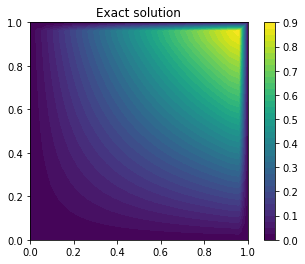

In [15]:
nx=25
mesh=UnitSquareMesh(nx,nx)
V=FunctionSpace(mesh,'DG',4)
b=Constant((1.0,1.0))
Pe = 100

u_D = Expression('(x[0]+ (exp(Pe*b[0]*x[0]) - 1)/(1 - exp(Pe*b[0])) )*( x[1]+ (exp(Pe*b[1]*x[1]) - 1)/(1 - exp(Pe*b[1])))',
                 degree=4, Pe=Pe, b=b,domain=mesh)

p=plot(u_D,mesh=mesh)
plt.colorbar(p)
plt.title('Exact solution')

In [20]:
#weak form
u=TrialFunction(V)
v=TestFunction(V)
n=FacetNormal(mesh)
bn=(dot(b,n) + abs(dot(b,n)))/2
hmax=mesh.hmax()
tau=hmax/(dot(b,b)**0.5)

uu = interpolate(u_D,V)
f=-1/Pe*div(grad(u_D)) + dot(b,grad(u_D))

a = 1/Pe*inner(grad(u), grad(v)) * dx - inner(b*u,grad(v))*dx \
+ inner( bn('+')*u('+') - bn('-')*u('-'), jump(v) )*dS + inner( u*dot(b,n), v )*ds #\
#+ inner(-1/Pe*div(grad(u))+dot(b,grad(u)), tau*nabla_div(b*v))*dx

L = f*v*dx #+ f*tau*nabla_div(b*v)*dx

u_sol = Function(V)

def boundary(x, on_boundary):
    return on_boundary
bc = DirichletBC(V, u_D, boundary,"geometric")

solve(a == L, u_sol, bc)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


L2 Error:
0.0204697612342


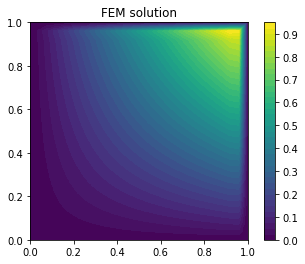

In [21]:
p=plot(u_sol)
plt.colorbar(p)
plt.title('FEM solution')

l2_err = np.sqrt(assemble(inner(u_sol-uu,u_sol-uu)*dx))
print('L2 Error:')
print(l2_err)